<a href="https://colab.research.google.com/github/cjakuc/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module3-join-and-reshape-data/LS_DS_113_Join_and_Reshape_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [1]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-01-15 22:35:58--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.112.221
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.112.221|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  16.6MB/s    in 13s     

2020-01-15 22:36:12 (14.7 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [2]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [3]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [4]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [5]:
import pandas as pd

orders = pd.read_csv('orders.csv')
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [12]:
q1_orders = orders[['order_id','user_id']]
q1_orders.head()

,order_id,user_id
0,2539329,1
1,2398795,1
2,473747,1
3,2254736,1
4,431534,1


In [6]:
products = pd.read_csv('products.csv')
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [13]:
q1_products = products[['product_id','product_name']]
q1_products.head()

,product_id,product_name
0,1,Chocolate Sandwich Cookies
1,2,All-Seasons Salt
2,3,Robust Golden Unsweetened Oolong Tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...
4,5,Green Chile Anytime Sauce


In [7]:
order_products = pd.concat([pd.read_csv('order_products__prior.csv'), 
                            pd.read_csv('order_products__train.csv')])
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [16]:
q1_order_products = order_products[['order_id','product_id']]
q1_order_products.head()

,order_id,product_id
0,2,33120
1,2,28985
2,2,9327
3,2,45918
4,2,30035


In [21]:
merged = q1_orders.merge(q1_products.merge(q1_order_products))
merged.head()

,order_id,user_id,product_id,product_name
0,2539329,1,196,Soda
1,2539329,1,12427,Original Beef Jerky
2,2539329,1,14084,Organic Unsweetened Vanilla Almond Milk
3,2539329,1,26088,Aged White Cheddar Popcorn
4,2539329,1,26405,XL Pick-A-Size Paper Towel Rolls


1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

In [22]:
top_products = ['Banana','Bag of Organic Bananas','Organic Strawberries','Organic Baby Spinach',
                'Organic Hass Avocado','Organic Avocado','Large Lemon','Strawberries',
                'Limes','Organic Whole Milk']
condition = merged['product_name'].isin(top_products)
merged = merged[condition]
merged['product_name'].value_counts()

Banana                    491291
Bag of Organic Bananas    394930
Organic Strawberries      275577
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Organic Avocado           184224
Large Lemon               160792
Strawberries              149445
Limes                     146660
Organic Whole Milk        142813
Name: product_name, dtype: int64

## Reshape Data Section

- Replicate the lesson code. Remember, if you haven't followed along typing out what we did during lecture, do that now to get more repetition with the syntax.
- Take table 2 (the transpose of table 1) and practice changing it into Tidy format and back again. You should not use the transpose operation anywhere in this code:
 - Table 2 --> Tidy
 - Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [23]:
import pandas as pd
import numpy as np

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [24]:
# table2 -> tidy
table2 = table2.reset_index()
table2

,index,John Smith,Jane Doe,Mary Johnson
0,treatmenta,NaN,16.0,3.0
1,treatmentb,2.0,11.0,1.0


In [25]:
tidy2 = table2.melt(id_vars='index',value_vars=['John Smith','Jane Doe','Mary Johnson'])
tidy2

,index,variable,value
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [26]:
tidy2 = tidy2.rename(columns={
    'index':'trt',
    'variable':'name',
    'value':'result'
})
tidy2

,trt,name,result
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [27]:
# tidy -> table2
wide2 = tidy2.pivot_table(index='name',columns='trt',values='result')
wide2

trt,treatmenta,treatmentb
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


In [30]:
import seaborn as sns
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [32]:
# Flights Pivot Table
flights.pivot_table(index='year', 
                   columns='month', 
                   values='passengers')

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [8]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [9]:
# Create q2_orders df with just the order id and hour of day
q2_orders = orders[['order_id','order_hour_of_day']]
print(q2_orders.shape)
q2_orders.head()

(3421083, 2)


,order_id,order_hour_of_day
0,2539329,8
1,2398795,7
2,473747,12
3,2254736,7
4,431534,15


In [10]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [11]:
# Create q2_products df with just the product id and name
q2_products = products[['product_id','product_name']]
print(q2_products.shape)
q2_products.head()

(49688, 2)


,product_id,product_name
0,1,Chocolate Sandwich Cookies
1,2,All-Seasons Salt
2,3,Robust Golden Unsweetened Oolong Tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...
4,5,Green Chile Anytime Sauce


In [12]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [13]:
# Create q2_order_products df with just the order id and product id
q2_order_products = order_products[['order_id','product_id']]
print(q2_order_products.shape)
q2_order_products.head()

(33819106, 2)


,order_id,product_id
0,2,33120
1,2,28985
2,2,9327
3,2,45918
4,2,30035


In [16]:
# Merge all the q2 DFs
q2_merged = q2_orders.merge(q2_products.merge(q2_order_products))
print(q2_merged.shape)
q2_merged.head()

(33819106, 4)


,order_id,order_hour_of_day,product_id,product_name
0,2539329,8,196,Soda
1,2539329,8,12427,Original Beef Jerky
2,2539329,8,14084,Organic Unsweetened Vanilla Almond Milk
3,2539329,8,26088,Aged White Cheddar Popcorn
4,2539329,8,26405,XL Pick-A-Size Paper Towel Rolls


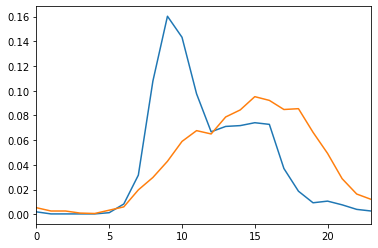

In [17]:
# Create a subset from q2_merged to test that everything is still correct
subset = q2_merged
froyo = subset[subset['product_name']=='Half Baked Frozen Yogurt']
cream = subset[subset['product_name']=='Half And Half Ultra Pasteurized']
cream['order_hour_of_day'].value_counts(normalize=True).sort_index()
froyo['order_hour_of_day'].value_counts(normalize=True).sort_index()
import matplotlib.pyplot as plt

(cream['order_hour_of_day']
 .value_counts(normalize=True)
 .sort_index()
 .plot())

# plt.show()

(froyo['order_hour_of_day']
 .value_counts(normalize=True)
 .sort_index()
 .plot());

In [19]:
# Check out what the hours of day look like
q2_merged['order_hour_of_day'].unique()

array([ 8,  7, 12, 15,  9, 14, 16, 11, 10, 19, 18, 17, 13, 20,  0, 21, 22,
        5, 23,  4,  6,  1,  2,  3])

In [40]:
# Create a new column for time of day

# Function that returns early or late depending on hour of day
def early_or_late(x):
  if(x<=11):
    return 'Early'
  else:
    return 'Late'

q2_merged['Time of Day'] = q2_merged['order_hour_of_day'].apply(early_or_late)
print(q2_merged.head())
q2_merged.tail()

   order_id  ...  Time of Day
0   2539329  ...        Early
1   2539329  ...        Early
2   2539329  ...        Early
3   2539329  ...        Early
4   2539329  ...        Early

[5 rows x 5 columns]


,order_id,order_hour_of_day,product_id,product_name,Time of Day
33819101,272231,14,24852,Banana,Late
33819102,272231,14,37966,French Baguette Bread,Late
33819103,272231,14,39216,Original Multigrain Spoonfuls Cereal,Late
33819104,272231,14,40603,Fabric Softener Sheets,Late
33819105,272231,14,42606,Phish Food Frozen Yogurt,Late


In [52]:
# Find the 25 most popular products to buy early
early_top_25 = q2_merged[q2_merged['Time of Day']=='Early']
early_top_25 = early_top_25['product_name'].value_counts()[:25]
early_top_25

Banana                        177907
Bag of Organic Bananas        142835
Organic Strawberries           97295
Organic Baby Spinach           87443
Organic Hass Avocado           76403
Organic Avocado                62695
Large Lemon                    56275
Strawberries                   54792
Organic Raspberries            52182
Organic Whole Milk             52049
Limes                          49999
Organic Yellow Onion           40728
Organic Garlic                 38439
Organic Zucchini               37510
Organic Blueberries            37484
Organic Fuji Apple             35591
Cucumber Kirby                 33588
Organic Half & Half            33204
Apple Honeycrisp Organic       32180
Seedless Red Grapes            31845
Organic Lemon                  31658
Honeycrisp Apple               30550
Organic Grape Tomatoes         29926
Sparkling Water Grapefruit     29467
Organic Baby Carrots           29326
Name: product_name, dtype: int64

In [54]:
# Find the 25 most popular products to buy early
late_top_25 = q2_merged[q2_merged['Time of Day']=='Late']
late_top_25 = late_top_25['product_name'].value_counts()[:25]
late_top_25

Banana                      313384
Bag of Organic Bananas      252095
Organic Strawberries        178282
Organic Baby Spinach        164262
Organic Hass Avocado        144474
Organic Avocado             121529
Large Lemon                 104517
Limes                        96661
Strawberries                 94653
Organic Whole Milk           90764
Organic Raspberries          90421
Organic Yellow Onion         76988
Organic Garlic               75497
Organic Zucchini             71902
Organic Blueberries          67542
Cucumber Kirby               66140
Organic Lemon                59593
Organic Grape Tomatoes       58152
Organic Fuji Apple           57298
Organic Cucumber             55883
Apple Honeycrisp Organic     55092
Seedless Red Grapes          54903
Honeycrisp Apple             52770
Organic Baby Carrots         51167
Yellow Onions                50864
Name: product_name, dtype: int64

In [93]:
# Filter for only the top 25 most popular products
condition = q2_merged['product_name'].isin(top_25.index)
q2_merged = q2_merged[condition]
q2_merged['product_name'].unique()     

array(['Bag of Organic Bananas', 'Organic Whole Milk',
       'Organic Raspberries', 'Honeycrisp Apple', 'Organic Avocado',
       'Strawberries', 'Banana', 'Organic Hass Avocado',
       'Organic Baby Spinach', 'Organic Strawberries', 'Cucumber Kirby',
       'Organic Baby Carrots', 'Organic Grape Tomatoes',
       'Organic Zucchini', 'Organic Blueberries', 'Seedless Red Grapes',
       'Organic Cucumber', 'Apple Honeycrisp Organic', 'Limes',
       'Large Lemon', 'Sparkling Water Grapefruit', 'Organic Lemon',
       'Organic Yellow Onion', 'Organic Fuji Apple', 'Organic Garlic'],
      dtype=object)

In [94]:
# Create wide format of to work towards a percent of orders by product variable
q2_wide = pd.crosstab(q2_merged['order_hour_of_day'],
                      q2_merged['product_name'],
                      normalize=True)
q2_wide

product_name,Apple Honeycrisp Organic,Bag of Organic Bananas,Banana,Cucumber Kirby,Honeycrisp Apple,Large Lemon,Limes,Organic Avocado,Organic Baby Carrots,Organic Baby Spinach,Organic Blueberries,Organic Cucumber,Organic Fuji Apple,Organic Garlic,Organic Grape Tomatoes,Organic Hass Avocado,Organic Lemon,Organic Raspberries,Organic Strawberries,Organic Whole Milk,Organic Yellow Onion,Organic Zucchini,Seedless Red Grapes,Sparkling Water Grapefruit,Strawberries
order_hour_of_day,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.000142,0.000731,0.000751,0.000194,0.000137,0.000265,0.000251,0.000315,0.000142,0.000474,0.000201,0.000156,0.000149,0.000202,0.000166,0.000372,0.000171,0.000246,0.000489,0.000243,0.000187,0.000197,0.000157,0.000093,0.000250
1,0.000062,0.000373,0.000378,0.000099,0.000063,0.000130,0.000129,0.000153,0.000064,0.000258,0.000093,0.000073,0.000068,0.000106,0.000082,0.000186,0.000086,0.000113,0.000234,0.000109,0.000105,0.000096,0.000084,0.000045,0.000124
2,0.000039,0.000216,0.000223,0.000052,0.000038,0.000082,0.000069,0.000092,0.000042,0.000133,0.000058,0.000045,0.000041,0.000063,0.000050,0.000106,0.000054,0.000066,0.000124,0.000063,0.000053,0.000054,0.000044,0.000024,0.000072
3,0.000027,0.000155,0.000158,0.000037,0.000026,0.000062,0.000049,0.000064,0.000031,0.000104,0.000041,0.000033,0.000031,0.000046,0.000030,0.000086,0.000037,0.000045,0.000089,0.000036,0.000037,0.000043,0.000030,0.000021,0.000048
4,0.000031,0.000162,0.000184,0.000044,0.000026,0.000066,0.000056,0.000065,0.000038,0.000102,0.000041,0.000041,0.000033,0.000046,0.000031,0.000085,0.000040,0.000052,0.000102,0.000043,0.000042,0.000044,0.000034,0.000022,0.000065
5,0.000068,0.000275,0.000352,0.000079,0.000051,0.000115,0.000086,0.000108,0.000065,0.000183,0.000079,0.000062,0.000059,0.000073,0.000055,0.000159,0.000060,0.000104,0.000198,0.000099,0.000078,0.000075,0.000062,0.000042,0.000120
6,0.000217,0.000958,0.001274,0.000242,0.000208,0.000348,0.000307,0.000401,0.000212,0.000595,0.000269,0.000198,0.000224,0.000218,0.000206,0.000519,0.000203,0.000379,0.000738,0.000404,0.000245,0.000245,0.000228,0.000139,0.000384
7,0.000719,0.003142,0.003880,0.000682,0.000682,0.001058,0.000934,0.001279,0.000629,0.001899,0.000852,0.000614,0.000706,0.000704,0.000631,0.001705,0.000612,0.001255,0.002394,0.001307,0.000778,0.000767,0.000680,0.000501,0.001233
8,0.001356,0.005917,0.007329,0.001261,0.001247,0.002122,0.001860,0.002435,0.001176,0.003507,0.001544,0.001179,0.001439,0.001396,0.001157,0.003101,0.001238,0.002269,0.004144,0.002323,0.001553,0.001449,0.001301,0.001129,0.002266


In [95]:
q2_melted = q2_wide.reset_index().melt(id_vars='order_hour_of_day').rename(columns={
    'order_hour_of_day' : 'Hour of Day Ordered',
    'product_name' : 'Product',
    'value' : 'Percent of Orders by Product'
})
q2_melted.head()

,Hour of Day Ordered,Product,Percent of Orders by Product
0,0,Apple Honeycrisp Organic,0.000142
1,1,Apple Honeycrisp Organic,0.000062
2,2,Apple Honeycrisp Organic,0.000039
3,3,Apple Honeycrisp Organic,0.000027
4,4,Apple Honeycrisp Organic,0.000031


## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
##### YOUR CODE HERE #####